In [ ]:
#Importing the basic librarires

import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display




from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import linregress

import numpy as np
from numpy.polynomial.polynomial import Polynomial

import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the file
song_data = pd.read_csv("song_data.csv")
df = pd.DataFrame(song_data)



In [3]:
df

song_name  song_popularity  song_duration_ms  \
0      Boulevard of Broken Dreams               73            262333   
1                      In The End               66            216933   
2               Seven Nation Army               76            231733   
3                      By The Way               74            216933   
4               How You Remind Me               56            223826   
...                           ...              ...               ...   
18830              Let It Breathe               60            159645   
18831                     Answers               60            205666   
18832      Sudden Love (Acoustic)               23            182211   
18833           Gentle on My Mind               55            352280   
18834                    Up to Me               60            193533   

       acousticness  danceability  energy  instrumentalness  key  liveness  \
0          0.005520         0.496   0.682          0.000029    8    0.0589   
1          0.010300         0.542   0.853          0.000000    3    0.1080   
2          0.008170         0.737   0.463          0.447000    0    0.2550   
3          0.026400         0.451   0.970          0.003550    0    0.1020   
4          0.000954         0.447   0.766          0.000000   10    0.1130   
...             ...           ...     ...               ...  ...       ...   
18830      0.893000         0.500   0.151          0.000065   11    0.1110   
18831      0.765000         0.495   0.161          0.000001   11    0.1050   
18832      0.847000         0.719   0.325          0.000000    0    0.1250   
18833      0.945000         0.488   0.326          0.015700    3    0.1190   
18834      0.911000         0.640   0.381          0.000254    4    0.1040   

       loudness  audio_mode  speechiness    tempo  time_signature  \
0        -4.095           1       0.0294  167.060               4   
1        -6.407           0       0.0498  105.256               4   
2        -7.828           1       0.0792  123.881               4   
3        -4.938           1       0.1070  122.444               4   
4        -5.065           1       0.0313  172.011               4   
...         ...         ...          ...      ...             ...   
18830   -16.107           1       0.0348  113.969               4   
18831   -14.078           0       0.0301   94.286               4   
18832   -12.222           1       0.0355  130.534               4   
18833   -12.020           1       0.0328  106.063               4   
18834   -11.790           1       0.0302   91.490               4   

       audio_valence  
0              0.474  
1              0.370  
2              0.324  
3              0.198  
4              0.574  
...              ...  
18830          0.300  
18831          0.265  
18832          0.286  
18833          0.323  
18834          0.581  

[18835 rows x 15 columns]

In [4]:
# check the total number of the music pieces
num_rows = song_data.shape[0]
num_rows

18835

In [5]:
print(song_data.columns.tolist())

['song_name', 'song_popularity', 'song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence']


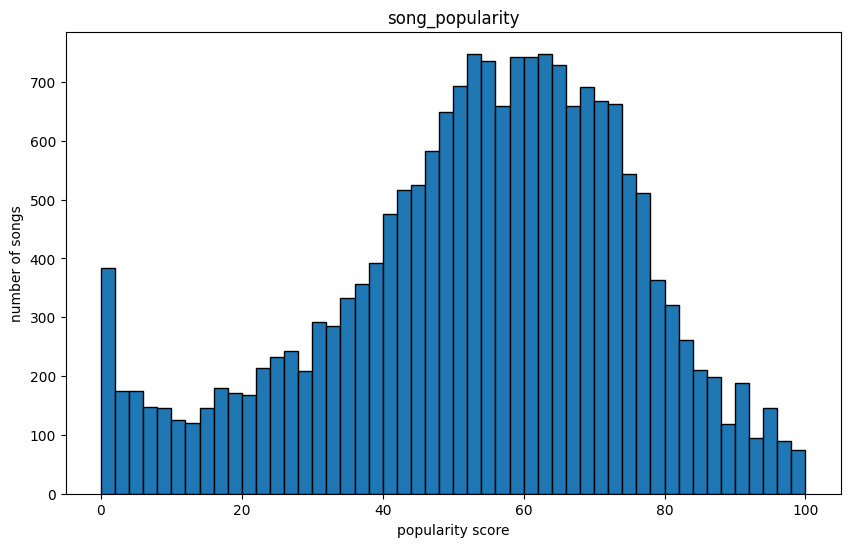

In [6]:
song_popularity_distribution = song_data["song_popularity"]
plt.hist(song_popularity_distribution, bins=50, edgecolor='black')
plt.title("song_popularity")
plt.xlabel("popularity score")
plt.ylabel("number of songs")
plt.show()

In [7]:
print(song_data.head())  # Inspect the first few rows
print(song_data.dtypes)  # Check the data types of each column

                    song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4      

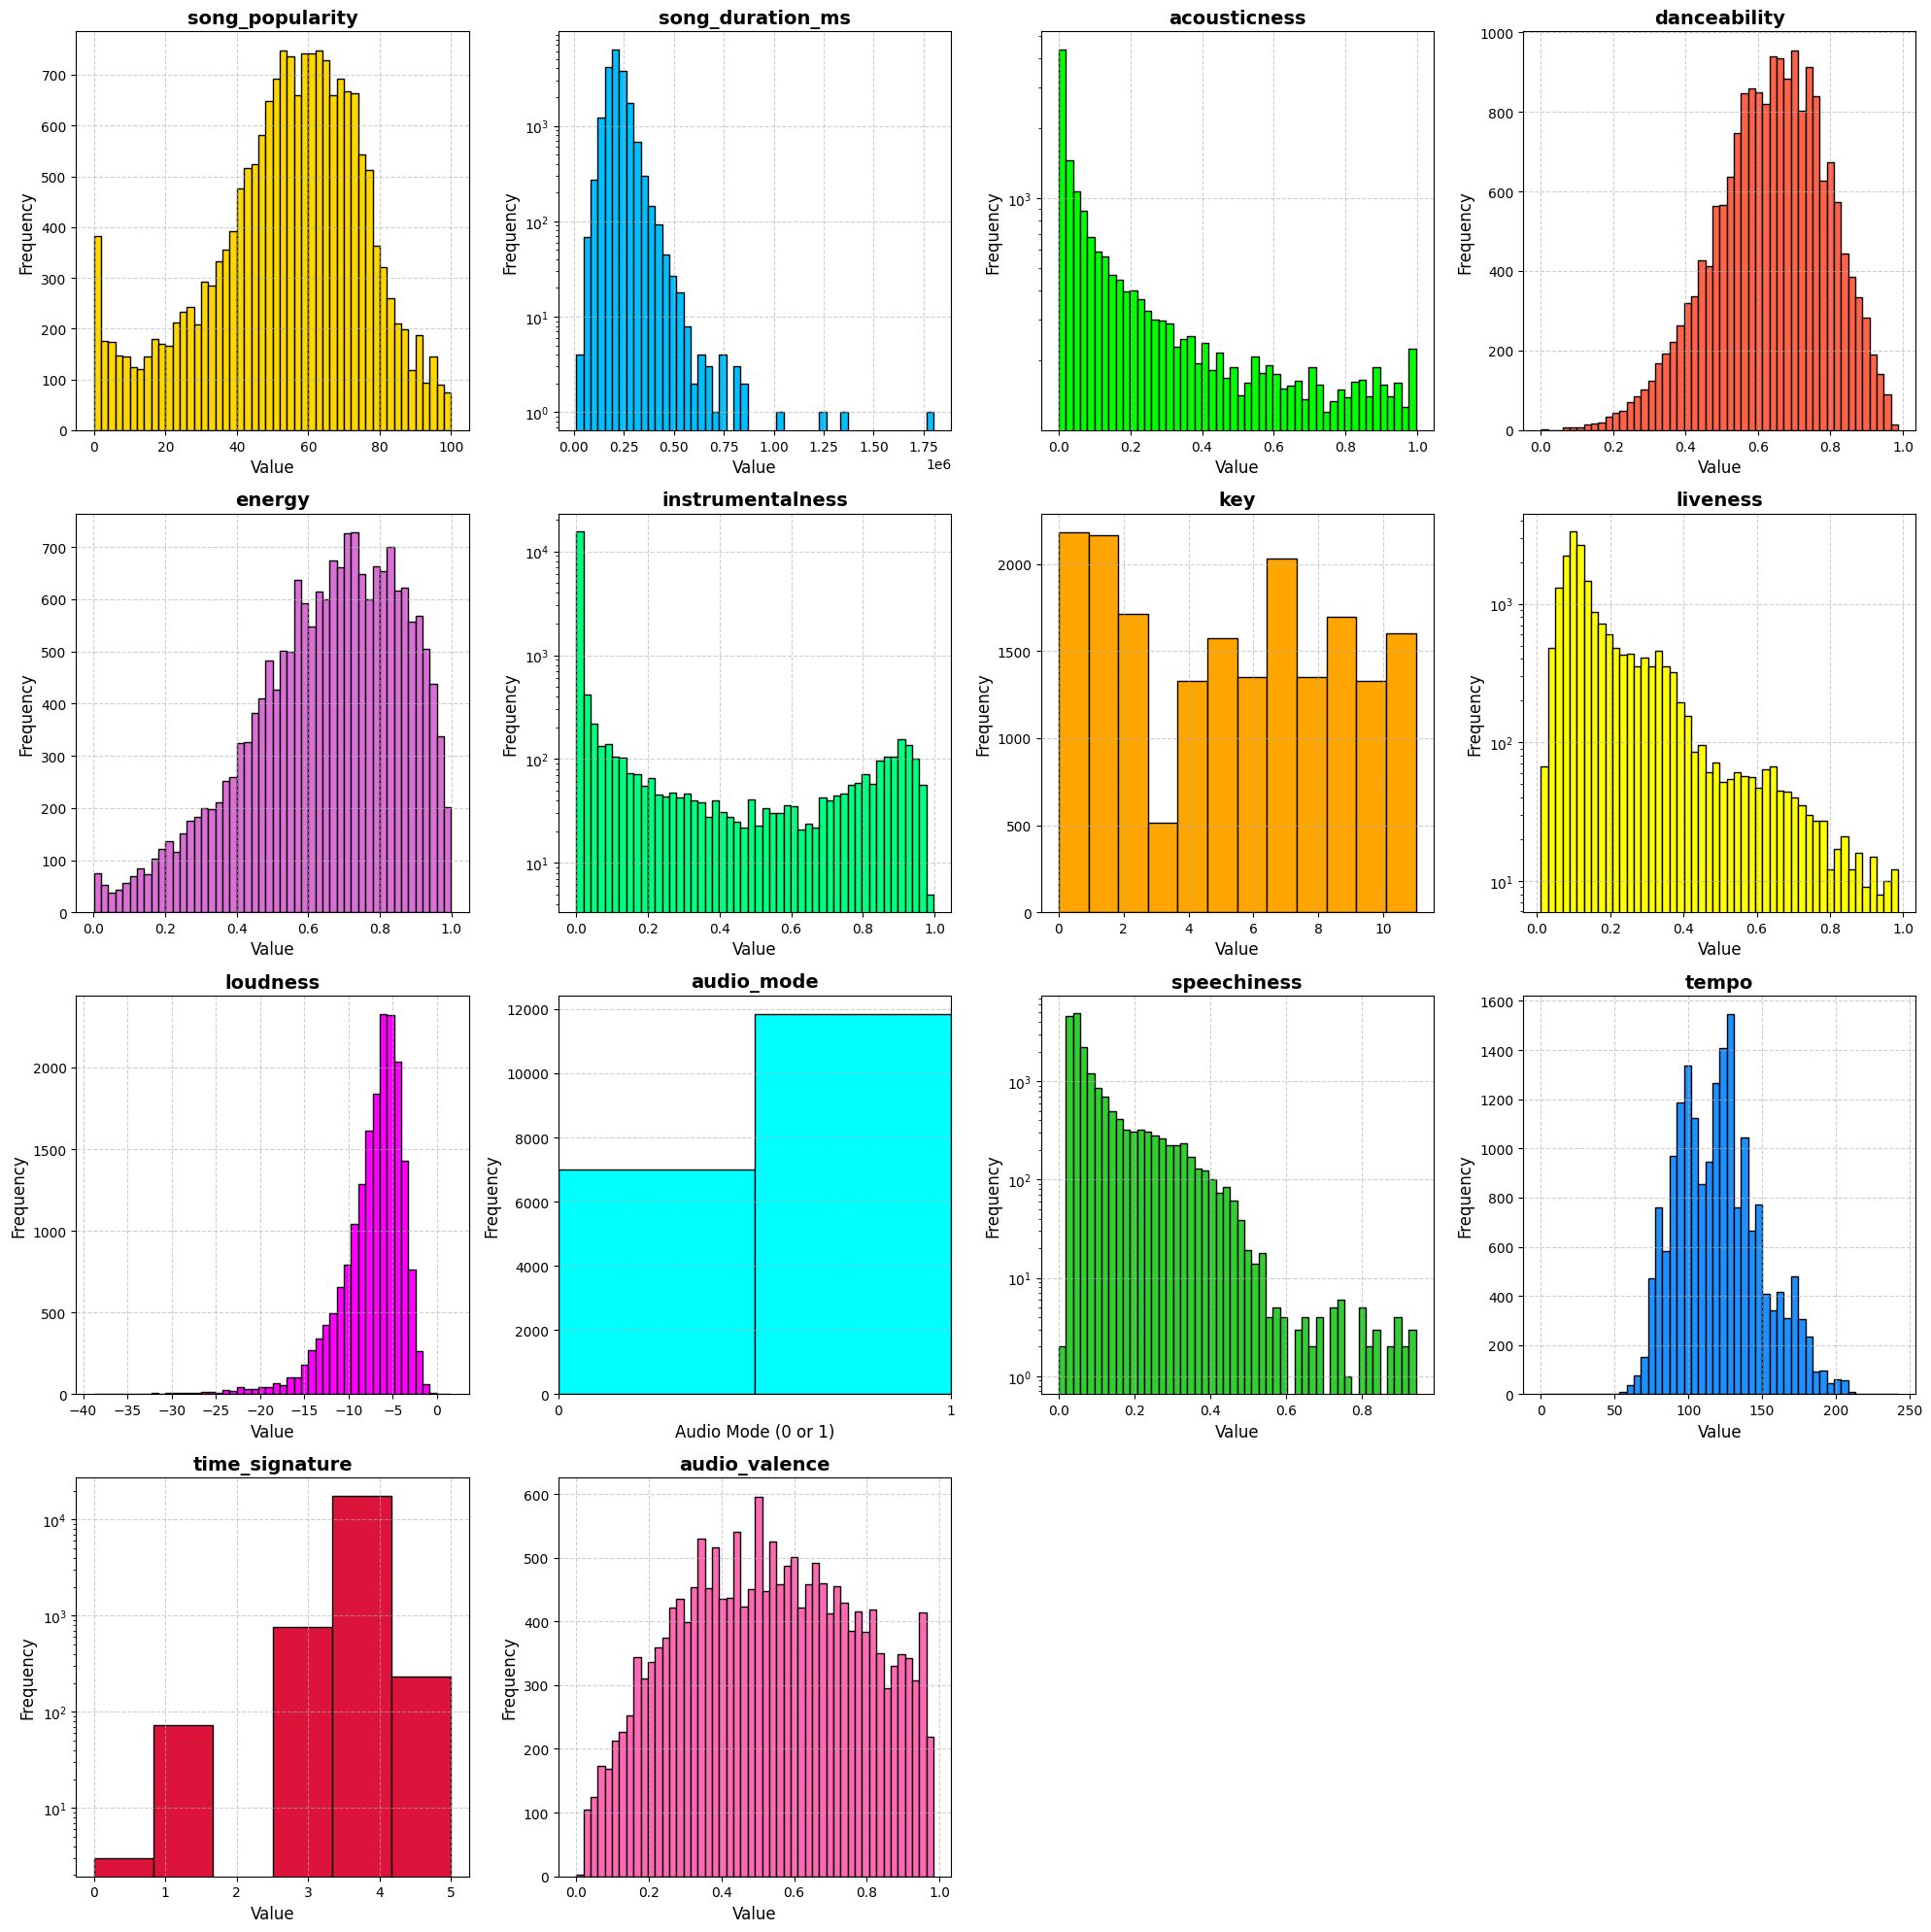

In [19]:
def create_customized_plots(song_data):
    """
    Generate a grid of customized histograms for numeric columns in the dataset, 
    visualizing data distributions with additional configurations for bin width, 
    axis scaling, gridlines, and annotations.

    Parameters:
    -----------
    song_data : pandas.DataFrame
        The dataset containing song features and popularity metrics. 
        Numeric columns are selected for plotting.

    Returns:
    --------
    None
        Displays a grid of plots for numeric columns in the dataset.

    Notes:
    ------
    - Each subplot corresponds to a numeric column in the dataset.
    - Configurable plot settings include bin count, color, gridlines, and log scaling.
    - The popularity column is used to annotate the distribution where applicable.
    - Special handling is implemented for binary data columns (e.g., `audio_mode`).

    Example:
    --------
    song_data = pd.read_csv("songs.csv")  # Load your dataset
    create_customized_plots(song_data)    # Generate and display plots
    """
    # Main plotting logic
    numeric_columns = song_data.select_dtypes(include=["number"]).columns
    popularity = song_data["song_popularity"]  # Ensure popularity column exists

    # Set up a grid for 14 plots (4x4 grid as an example)
    fig, axes = plt.subplots(4, 4, figsize=(20, 20))  # Adjust grid size and figure size as needed
    axes = axes.flatten()  # Flatten to 1D for easy iteration

    # Custom settings for each column
    custom_settings = [
        {"color": "gold", "bins": 50, "bin_width": None, "grid": True, "log": None, "xlim": None, "ylim": None},
        {"color": "deepskyblue", "bins": 50, "bin_width": None, "grid": True, "log": True, "xlim": None, "ylim": None},
        {"color": "lime", "bins": 50, "bin_width": None, "grid": True, "log": True, "xlim": None, "ylim": None},
        {"color": "tomato", "bins": 50, "bin_width": None, "grid": True, "log": None, "xlim": None, "ylim": None},
        {"color": "orchid", "bins": 50, "bin_width": None, "grid": True, "log": None, "xlim": None, "ylim": None},
        {"color": "springgreen", "bins": 50, "bin_width": None, "grid": True, "log": True, "xlim": None, "ylim": None},
        {"color": "orange", "bins": 12, "bin_width": None, "grid": True, "log": None, "xlim": None, "ylim": None},
        {"color": "yellow", "bins": 50, "bin_width": None, "grid": True, "log": True, "xlim": None, "ylim": None},
        {"color": "magenta", "bins": 50, "bin_width": None, "grid": True, "log": None, "xlim": None, "ylim": None},
        {"color": "cyan", "bins": 2, "bin_width": None, "grid": True, "log": None, "xlim": None, "ylim": None},
        {"color": "limegreen", "bins": 50, "bin_width": None, "grid": True, "log": True, "xlim": None, "ylim": None},
        {"color": "dodgerblue", "bins": 50, "bin_width": None, "grid": True, "log": None, "xlim": None, "ylim": None},
        {"color": "crimson", "bins": 6, "bin_width": None, "grid": True, "log": True, "xlim": None, "ylim": None},
        {"color": "hotpink", "bins": 50, "bin_width": None, "grid": True, "log": None, "xlim": None, "ylim": None},
    ]

    # Loop through the numeric columns and plot
    for i, column in enumerate(numeric_columns):
        if i >= len(custom_settings):  # Default settings for any additional columns
            custom_settings.append({
                "color": "gray", "bins": 50, "bin_width": None, 
                "grid": True, "annotate": True, "log": False, 
                "xlim": None, "ylim": None
            })
        
        settings = custom_settings[i]
        data = song_data[column].dropna()  # Drop NaN values before plotting
        pop_data = popularity.loc[data.index]  # Align popularity with valid data indices

        # Custom handling for 'audio mode' plot
        if column == "audio_mode":
            settings["bins"] = 2  # Only 0 and 1 values
            settings["xlim"] = (0, 1)
            settings["log"] = False  # Disable log scale for clarity
        
        customize_plot(
            ax=axes[i],
            data=data,
            popularity=pop_data,
            title=column,
            xlabel="Value" if column != "audio_mode" else "Audio Mode (0 or 1)",
            ylabel="Frequency",
            color=settings["color"],
            bins=settings["bins"],
            bin_width=settings["bin_width"],
            grid=settings["grid"],
            log=settings["log"],
            xlim=settings["xlim"],
            ylim=settings["ylim"],
            right_ylabel="Popularity (Mean)"  # Editable unit label for the right y-axis
        )
        
        # Further customization for 'audio mode' plot
        if column == "audio_mode":
            axes[i].set_xticks([0, 1])
            axes[i].set_xticklabels(["0", "1"])

    # Hide unused subplots if there are fewer than 16 columns
    for j in range(len(numeric_columns), len(axes)):
        axes[j].set_visible(False)

    # Adjust layout
    plt.tight_layout()
    plt.show()
    
    
create_customized_plots(song_data) 

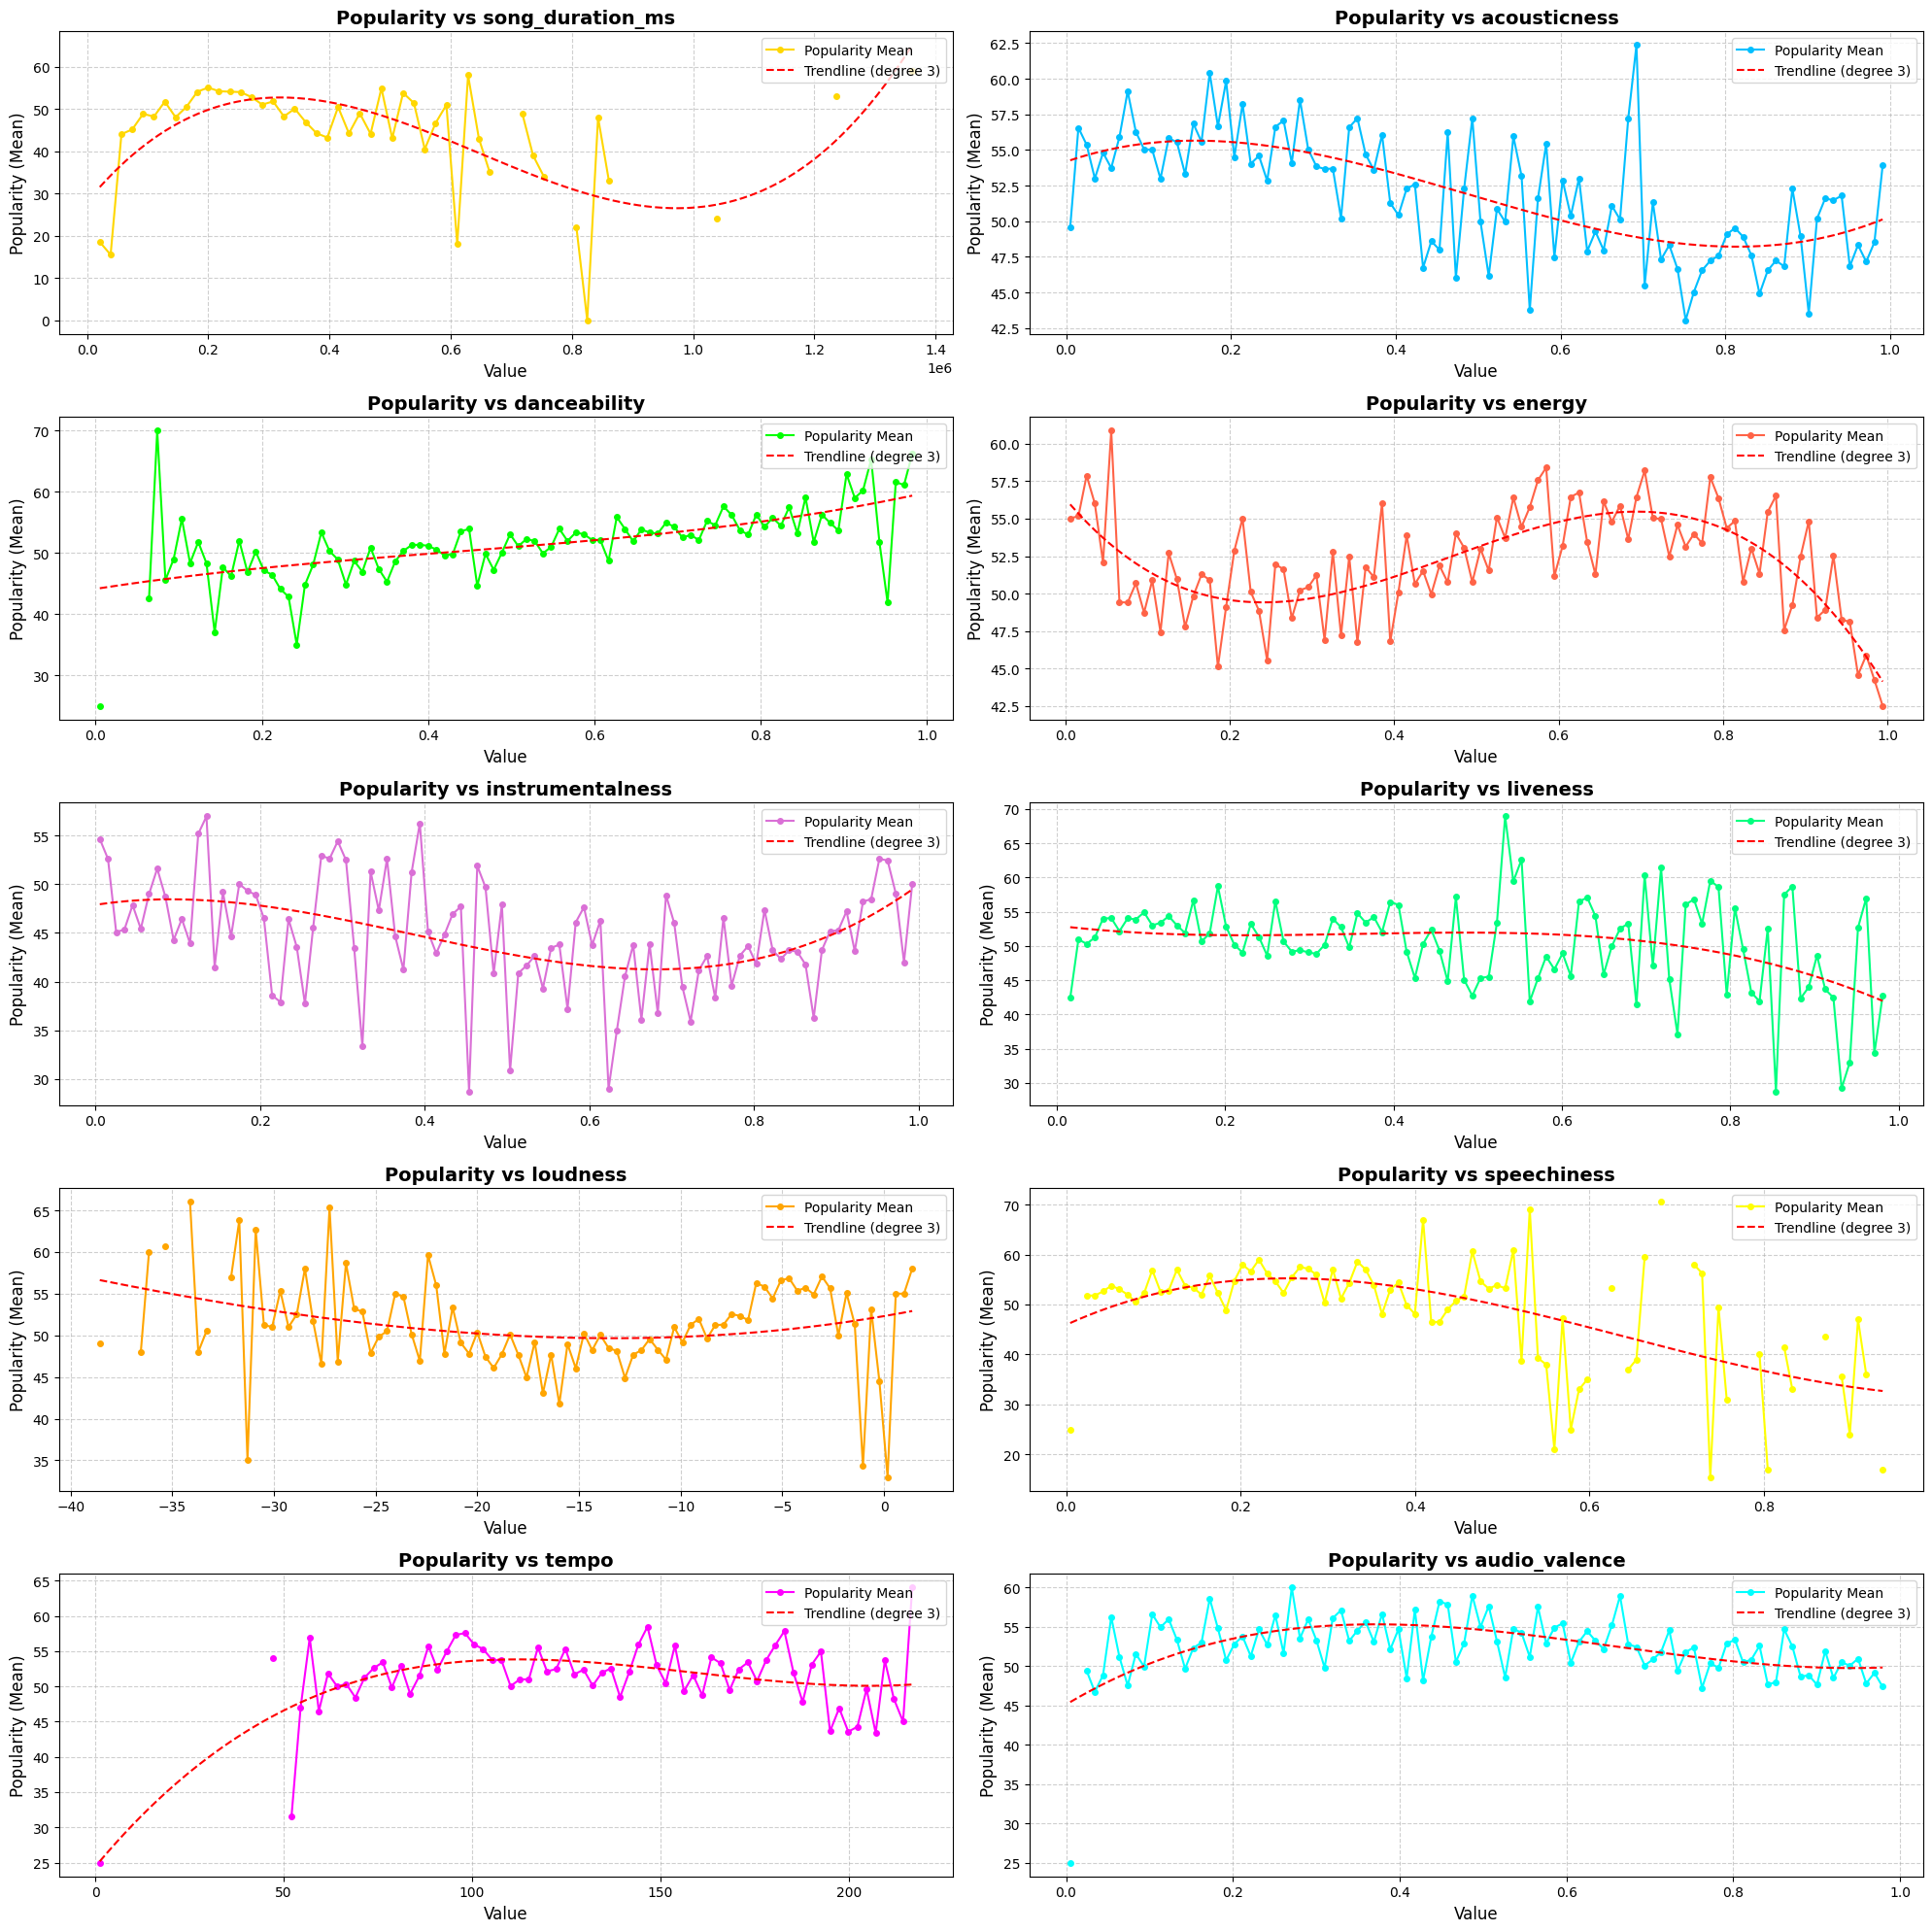

In [21]:
def create_popularity_means_plots(song_data):
    """
    Generate a grid of plots showing the mean popularity of songs across various features 
    with trendlines and optional contour maps.

    Parameters:
    -----------
    song_data : pandas.DataFrame
        The dataset containing song features and popularity metrics.
        Numeric columns are selected for plotting.

    Returns:
    --------
    None
        Displays a grid of popularity mean plots for numeric columns.

    Notes:
    ------
    - Each subplot corresponds to a numeric column in the dataset.
    - Popularity means are computed for each bin and plotted with a trendline.
    - Supports customization of bins, colors, and gridlines.
    - Certain indices are skipped based on pre-defined rules.
    """
    numeric_columns = song_data.select_dtypes(include=["number"]).columns
    popularity = song_data["song_popularity"]  # Ensure popularity column exists

    # Set up the grid for the plots
    fig, axes = plt.subplots(5, 2, figsize=(20, 20))  # Adjust grid size as needed
    axes = axes.flatten()  # Flatten to 1D for easy iteration

    # Custom settings for each popularity plot
    popularity_plot_settings = [
        {"color": "gold", "bins": 100,  "grid": True,  "xlim": None, "ylim": None},
        {"color": "deepskyblue", "bins": 100, "grid": True,  "xlim": None, "ylim": None},
        {"color": "lime", "bins": 100, "grid": True,  "xlim": None, "ylim": None},
        {"color": "tomato", "bins": 100, "grid": True,  "xlim": None, "ylim": None},
        {"color": "orchid", "bins": 100, "grid": True,  "xlim": None, "ylim": None},
        {"color": "springgreen", "bins": 100, "grid": True,  "xlim": None, "ylim": None},
        {"color": "orange", "bins": 100, "grid": True,  "xlim": None, "ylim": None},
        {"color": "yellow", "bins": 100, "grid": True,  "xlim": None, "ylim": None},
        {"color": "magenta", "bins": 100, "grid": True,  "xlim": None, "ylim": None},
        {"color": "cyan", "bins": 100, "grid": True,  "xlim": None, "ylim": None},
    ]

    # Initialize a counter for the next available subplot position
    current_position = 0

    # Loop through the numeric columns to plot popularity means
    for i, column in enumerate(numeric_columns):
        # Skip plots for indices 0, 6, 9, 12 (adjusting for 0-based indexing)
        if i in [0, 6, 9, 12]:
            continue
        
        # Use default settings if there aren't enough predefined customizations
        if current_position >= len(popularity_plot_settings):
            popularity_plot_settings.append({"color": "gray", "bins": 50, "grid": True, "xlim": None, "ylim": None})
        
        settings = popularity_plot_settings[current_position]
        data = song_data[column].dropna()  # Drop NaN values
        pop_data = popularity.loc[data.index]  # Align popularity with valid data indices

        plot_popularity_means(
            ax=axes[current_position],
            data=data,
            popularity=pop_data,
            title=f"Popularity vs {column}",
            xlabel="Value",
            ylabel="Popularity (Mean)",
            color=settings["color"],
            bins=settings["bins"],
            grid=settings["grid"],
            xlim=settings["xlim"],
            ylim=settings["ylim"]
        )
        
        current_position += 1  # Move to the next position

    # Hide any remaining unused subplots
    for j in range(current_position, len(axes)):
        axes[j].remove()  # Remove unused axes completely

    # Adjust layout
    plt.tight_layout()
    plt.show()

create_popularity_means_plots(song_data)

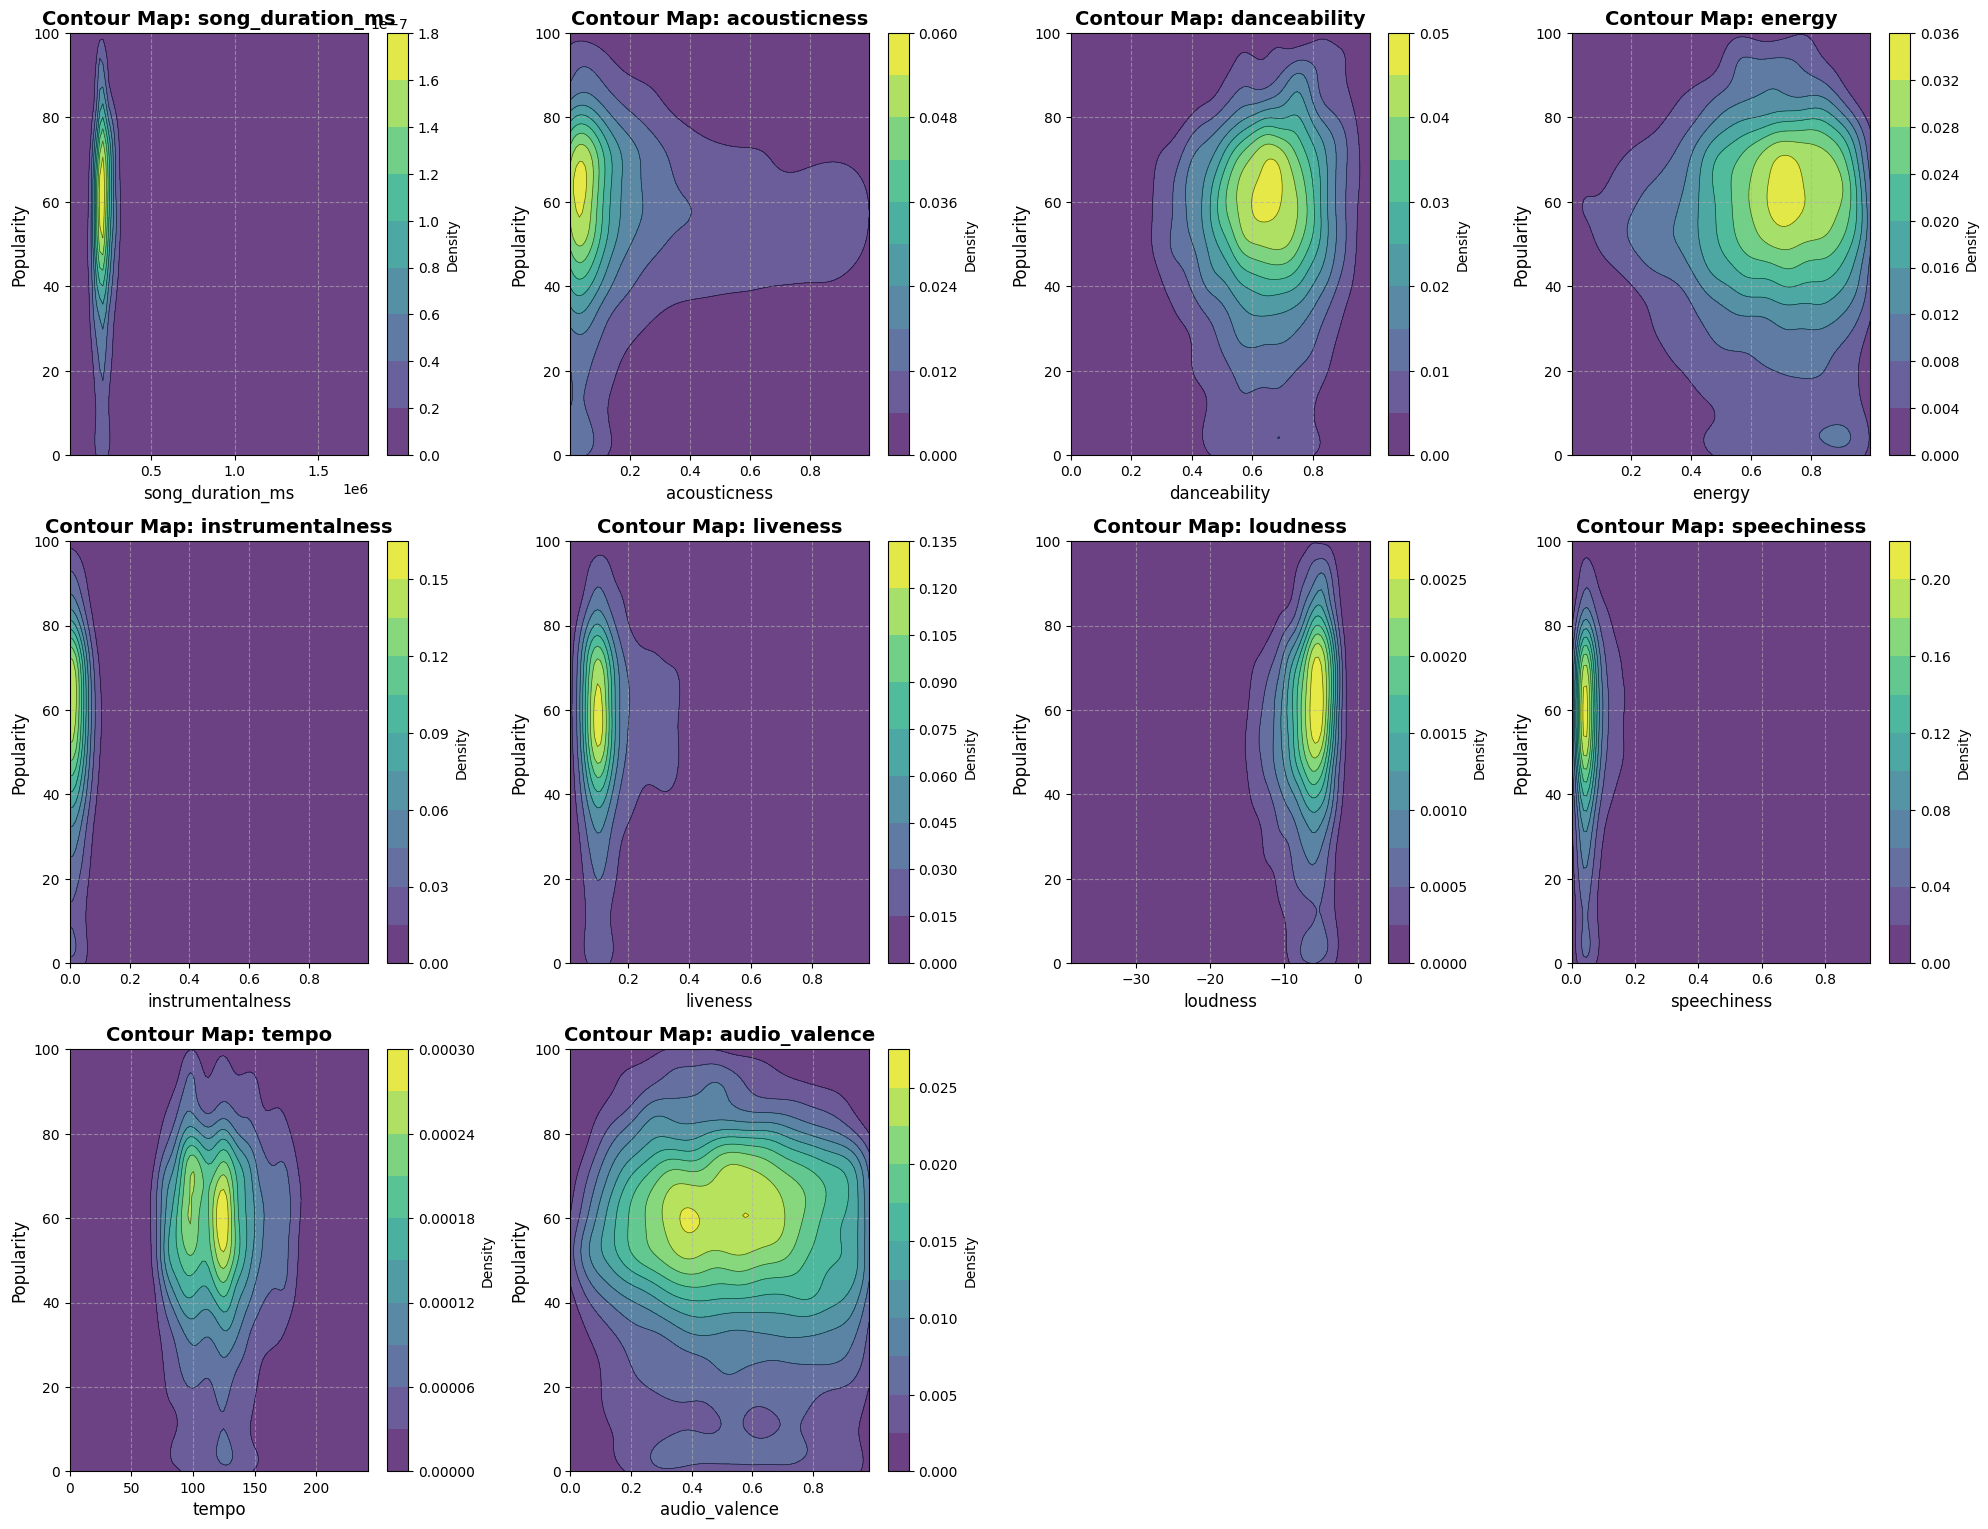

In [22]:
def create_contour_maps(song_data):
    """
    Generate a grid of contour maps showing the density distribution of features
    against song popularity.

    Parameters:
    -----------
    song_data : pandas.DataFrame
        The dataset containing song features and popularity metrics.
        Numeric columns are selected for plotting.

    Returns:
    --------
    None
        Displays a grid of contour maps for numeric columns.

    Notes:
    ------
    - Each subplot corresponds to a numeric column in the dataset.
    - Contour maps visualize the density distribution of data and popularity.
    - Certain indices are skipped based on pre-defined rules.

    Example:
    create_contour_maps(song_data)
    """
    def plot_contour_map(ax, data, popularity, title, xlabel, ylabel, bins=100, cmap='viridis'):
        """
        Plot a contour map to show the density distribution of data and popularity.

        Parameters:
        -----------
        ax : matplotlib.axes.Axes
            The axis on which to plot the contour map.
        data : array-like
            Feature data to be plotted.
        popularity : array-like
            Popularity data corresponding to the feature data.
        title : str
            Title of the plot.
        xlabel : str
            Label for the x-axis.
        ylabel : str
            Label for the y-axis.
        bins : int, optional, default=100
            Number of bins for the grid.
        cmap : str, optional, default='viridis'
            Colormap for the contour plot.
        """
        if len(data) > 1:  # Ensure enough data points for density estimation
            xy = np.vstack([data, popularity])
            
            # Add jitter to avoid singular matrix issues
            jitter = 1e-6 * np.random.randn(*xy.shape)
            xi, yi = np.linspace(data.min(), data.max(), bins), np.linspace(popularity.min(), popularity.max(), bins)
            xi, yi = np.meshgrid(xi, yi)
            
            # Compute density
            density = gaussian_kde(xy + jitter)(np.vstack([xi.ravel(), yi.ravel()])).reshape(xi.shape)
            
            # Plot contour map
            contour = ax.contourf(xi, yi, density, levels=10, cmap=cmap, alpha=0.8)
            ax.contour(xi, yi, density, levels=10, linewidths=0.5, colors='black', alpha=0.6)
            
            # Add color bar
            cbar = plt.colorbar(contour, ax=ax, orientation='vertical')
            cbar.set_label('Density')
        
        # Set axis labels and title
        ax.set_title(title, fontsize=14, fontweight='bold')
        ax.set_xlabel(xlabel, fontsize=12)
        ax.set_ylabel(ylabel, fontsize=12)
        ax.grid(True, linestyle='--', alpha=0.6)

    numeric_columns = song_data.select_dtypes(include=["number"]).columns
    popularity = song_data["song_popularity"]  # Ensure popularity column exists

    # Set up the grid for contour plots
    fig, axes = plt.subplots(4, 4, figsize=(20, 20))  # Adjust grid size as needed
    axes = axes.flatten()  # Flatten to 1D for easy iteration

    # Initialize a counter for the next available subplot position
    current_position = 0

    # Loop through the numeric columns to plot contour maps
    for i, column in enumerate(numeric_columns):
        # Skip plots for indices 0, 6, 9, 12 (adjusting for 0-based indexing)
        if i in [0, 6, 9, 12]:
            continue
        
        data = song_data[column].dropna()  # Drop NaN values
        pop_data = popularity.loc[data.index]  # Align popularity with valid data indices
        
        # Plot contour map
        plot_contour_map(
            ax=axes[current_position],
            data=data,
            popularity=pop_data,
            title=f"Contour Map: {column}",
            xlabel=column,
            ylabel="Popularity",
            bins=100,
            cmap='viridis'
        )
        
        current_position += 1  # Move to the next position

    # Hide any remaining unused subplots
    for j in range(current_position, len(axes)):
        axes[j].remove()  # Remove unused axes completely

    # Adjust layout
    plt.tight_layout()
    plt.show()

create_contour_maps(song_data)

g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

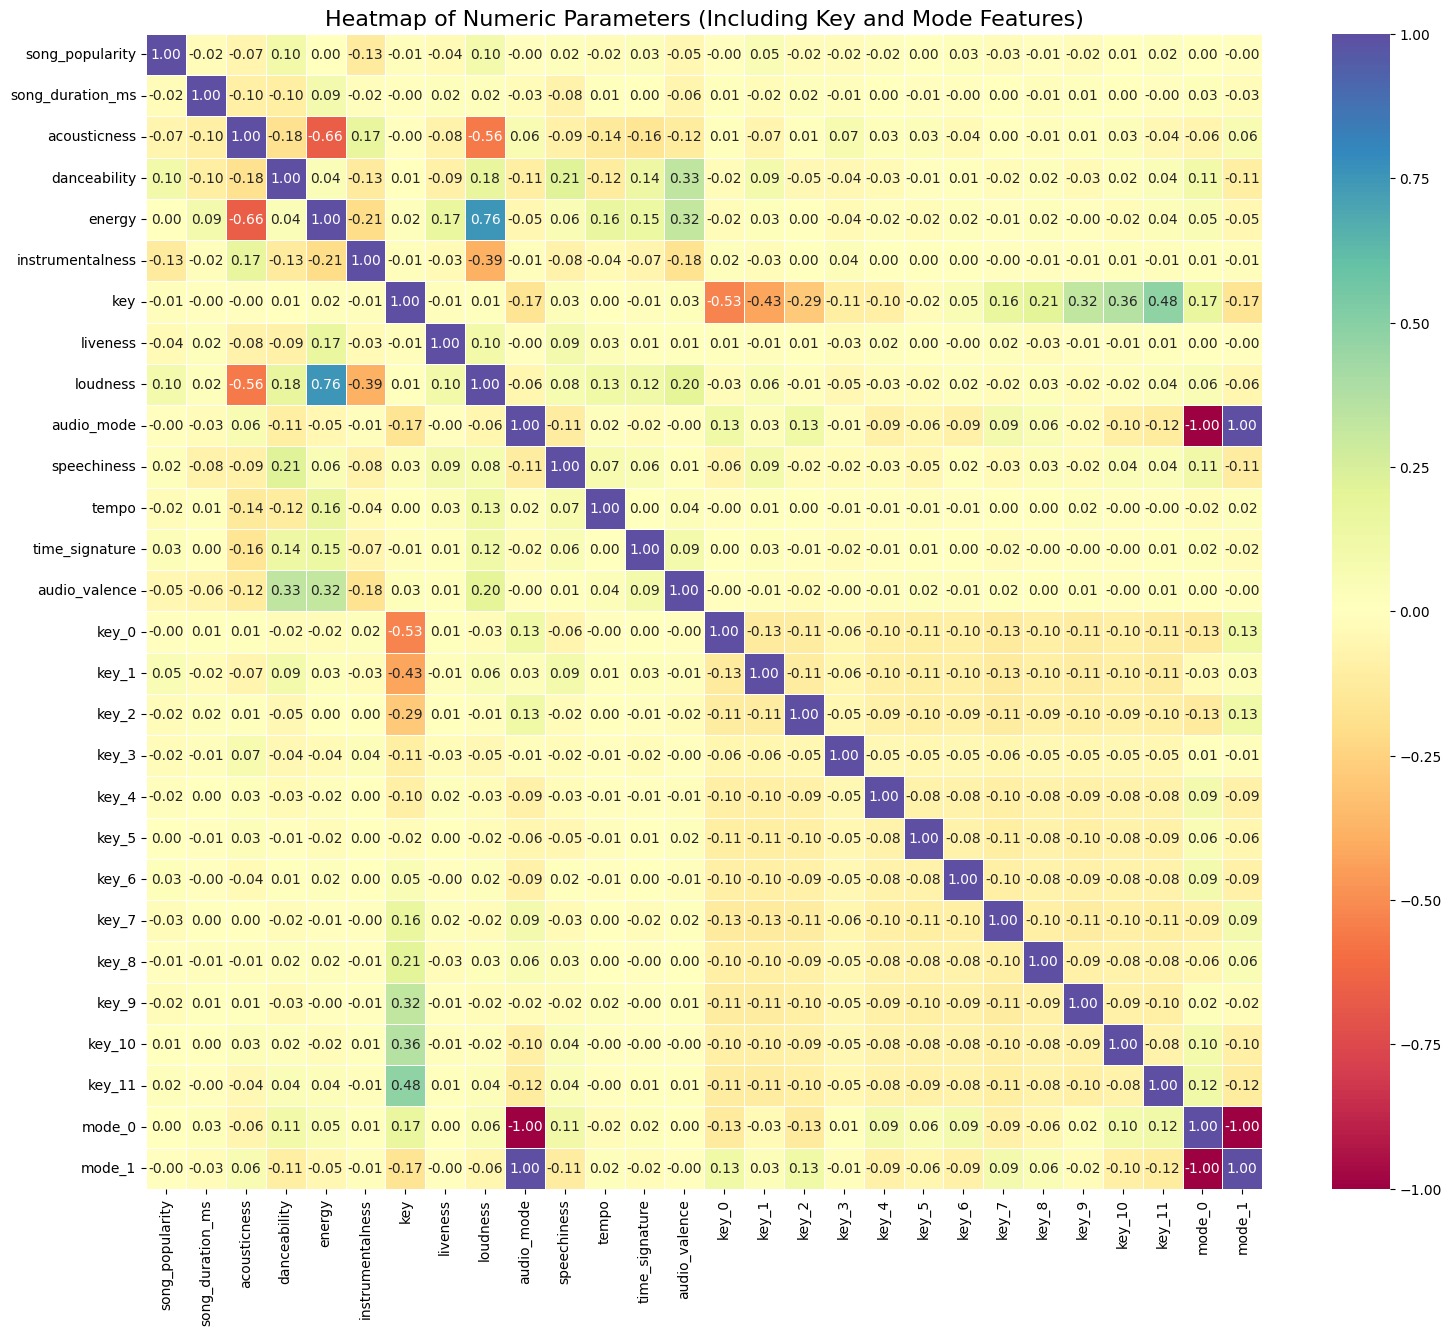

In [ ]:
def plot_correlation_heatmap(song_data):
    """
    Generate a correlation heatmap of numeric features in the dataset, 
    including one-hot encoded versions of the `key` and `audio_mode` features.

    Parameters:
    -----------
    song_data : pandas.DataFrame
        The dataset containing song features, including `key` and `audio_mode` for encoding.

    Returns:
    --------
    None
        Displays a heatmap showing correlations between all numeric features.

    Example:
    --------
    plot_correlation_heatmap(song_data)
    """
    # One-hot encode `key` and `audio_mode`
    keys_encoded = pd.get_dummies(song_data['key'], prefix='key')
    modes_encoded = pd.get_dummies(song_data['audio_mode'], prefix='mode')

    # Combine original numeric data with the encoded features
    numeric_data = pd.concat([song_data.select_dtypes(include=["number"]), keys_encoded, modes_encoded], axis=1)

    # Compute the correlation matrix
    correlation_matrix = numeric_data.corr()

    # Create a heatmap
    plt.figure(figsize=(18, 15))
    sns.heatmap(correlation_matrix, annot=True, cmap="Spectral", fmt=".2f", linewidths=0.5)
    plt.title("Heatmap of Numeric Parameters (Including Key and Mode Features)", fontsize=16)
    plt.show()
    

plot_correlation_heatmap(song_data)

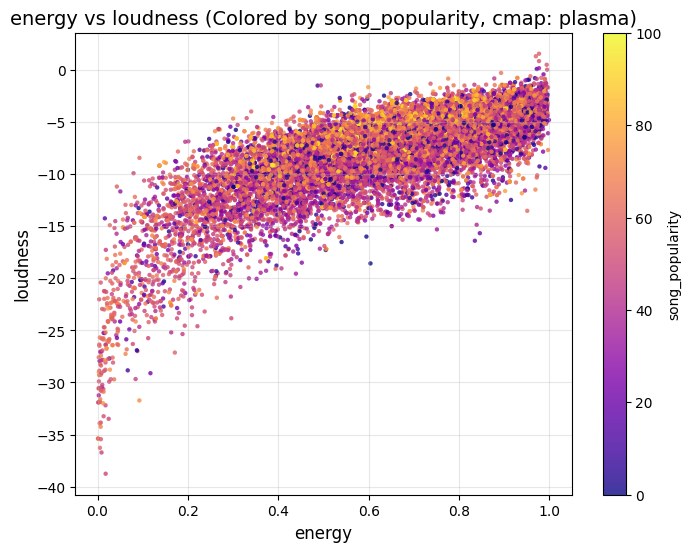

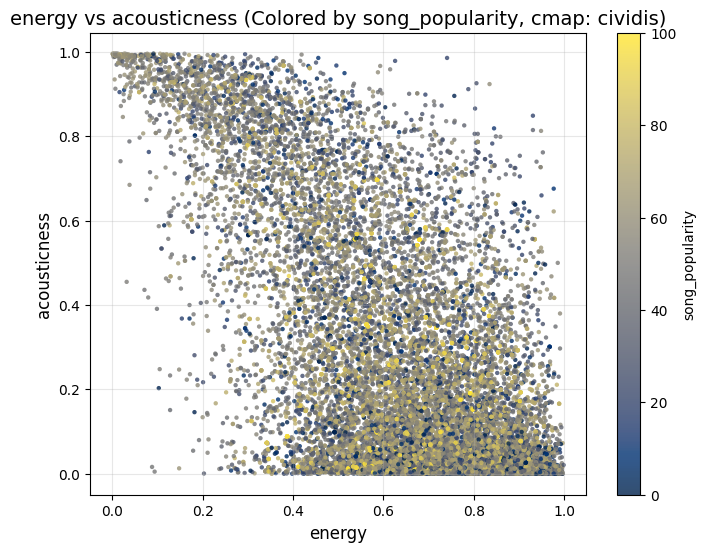

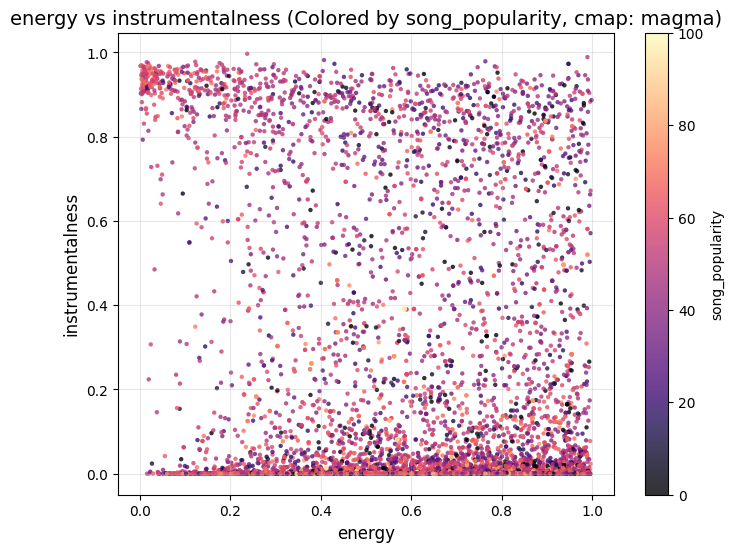

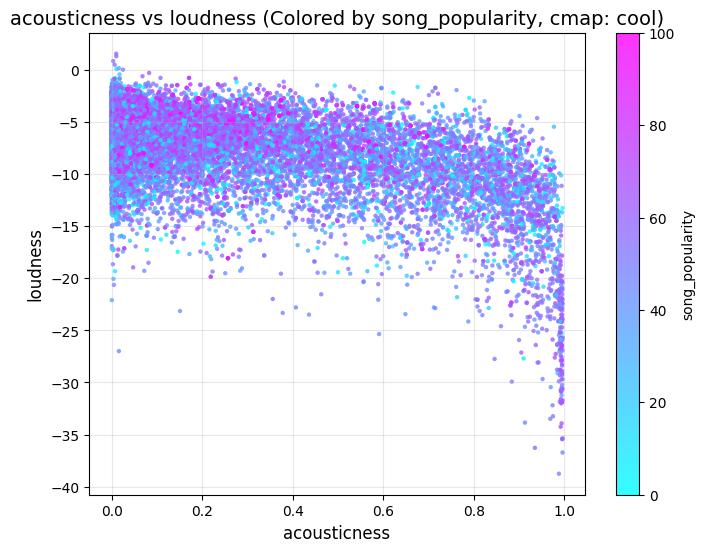

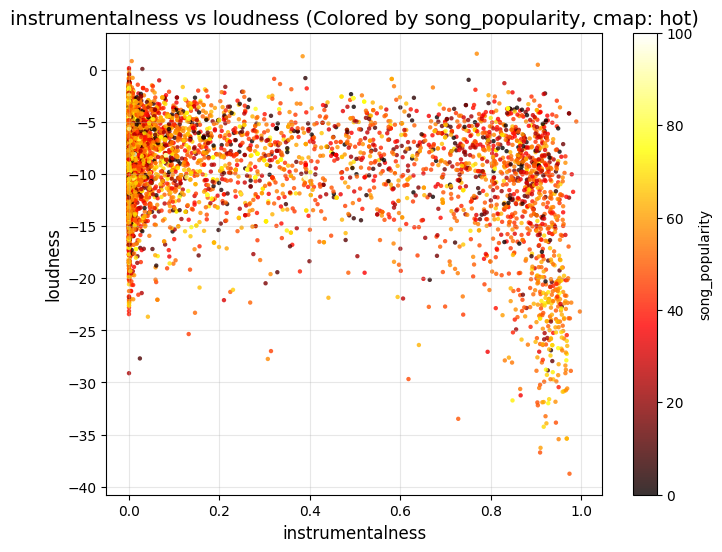

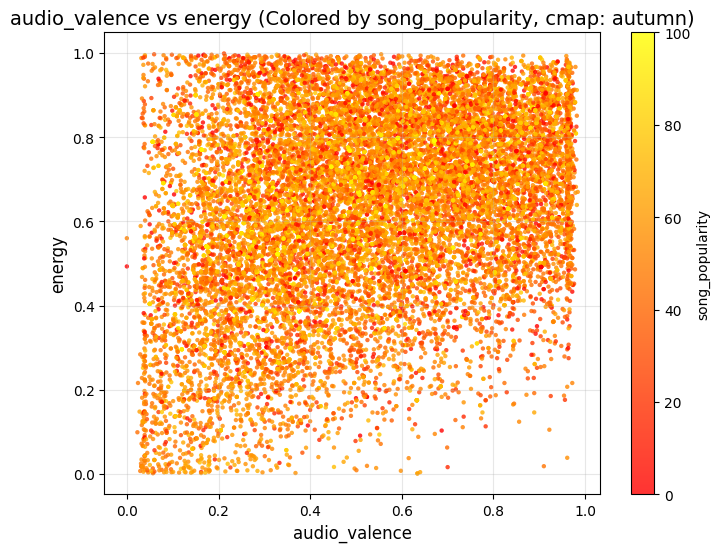

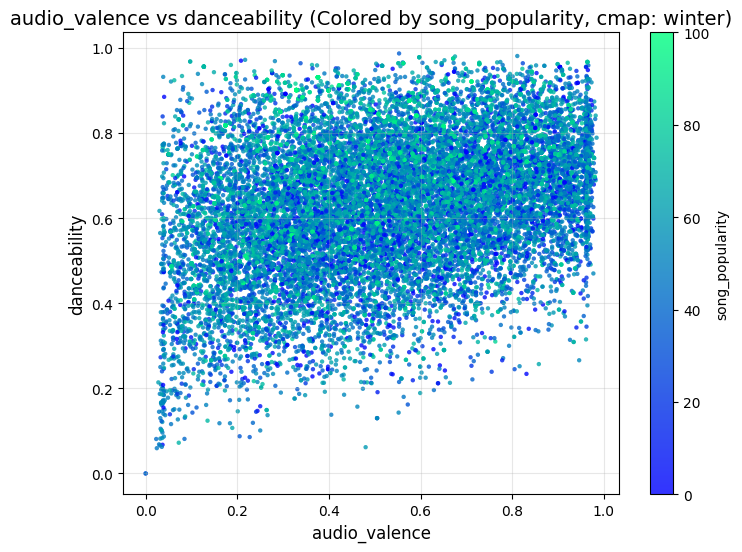

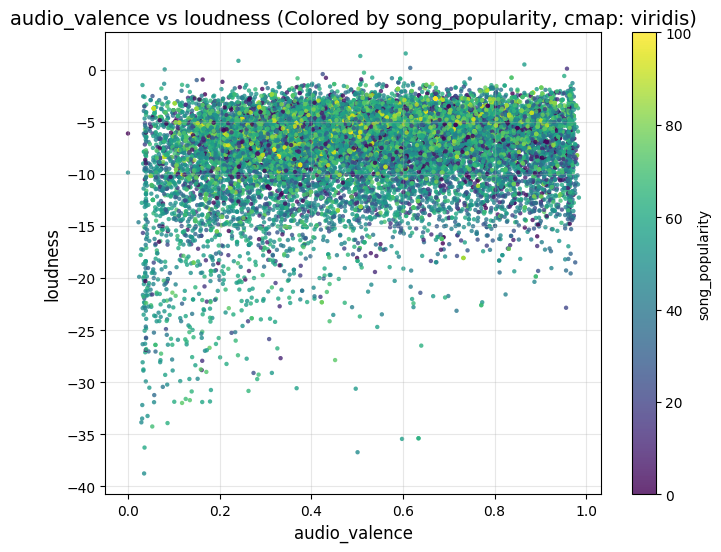

In [26]:
def generate_scatter_plots(song_data):
    """
    Generate scatter plots for specific variable pairs, colored by song popularity, 
    and save the plots to disk with varying colormaps.

    Parameters:
    -----------
    song_data : pandas.DataFrame
        The dataset containing song features and song popularity.

    Returns:
    --------
    None
        Displays and saves scatter plots for variable pairs.

    Notes:
    ------
    - Scatter plots visualize relationships between pairs of features.
    - Points are colored by `song_popularity` using different colormaps.

    Example:
    --------
    generate_scatter_plots(song_data)
    """
    import matplotlib.pyplot as plt

    # Define variable pairs for scatter plots
    plot_pairs = [
        ('energy', 'loudness'),
        ('energy', 'acousticness'),
        ('energy', 'instrumentalness'),
        ('acousticness', 'loudness'),
        ('instrumentalness', 'loudness'),
        ('audio_valence', 'energy'),
        ('audio_valence', 'danceability'),
        ('audio_valence', 'loudness')
    ]
    # List of colormaps to cycle through
    colormaps = ['viridis', 'plasma', 'cividis', 'magma', 'cool', 'hot', 'autumn', 'winter']

    # Generate and save each plot
    for i, (x_var, y_var) in enumerate(plot_pairs, start=1):
        cmap = colormaps[i % len(colormaps)]  # Cycle through colormaps
        plt.figure(figsize=(8, 6))
        scatter = plt.scatter(
            song_data[x_var], song_data[y_var],
            c=song_data['song_popularity'], cmap=cmap, alpha=0.8, edgecolors='none', s=10
        )
        plt.colorbar(scatter, label='song_popularity')
        plt.title(f'{x_var} vs {y_var} (Colored by song_popularity, cmap: {cmap})', fontsize=14)
        plt.xlabel(x_var, fontsize=12)
        plt.ylabel(y_var, fontsize=12)
        plt.grid(alpha=0.3)
        plt.savefig(f'scatter_plot_{x_var}_vs_{y_var}_cmap_{cmap}.png')  # Save each plot with cmap in the name

generate_scatter_plots(song_data)